WORDS IN TEXT

In [1]:
from pathlib import Path
from textblob import TextBlob
blob = TextBlob(Path("RomeoAndJuliet.txt").read_text(encoding='utf-8'))

In [2]:
#lets get the frequency of seveal key words
blob.word_counts['juliet']

194

In [3]:
blob.word_counts['romeo']

319

In [4]:
blob.word_counts['thou']

278

In [5]:
#if you tokenize text into a wordlist you can use count methood to count number of occurences for specific words
blob.words.count('joy')

14

In [6]:
blob.noun_phrases.count('lady capulet')

46

In [7]:
#getting definitions synonyms ands antonyms from wordnet
from textblob import Word
happy = Word('happy')
happy.definitions

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

In [8]:
#getting synonyms using synsets
happy.synsets

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [9]:
#creating a set of synonyms using a synsets lemmas method which returns a list of lemma objects representing the synonyms
synonyms = set()
for synset in happy.synsets:
    for lemma in synset.lemmas():
        synonyms.add(lemma.name())

synonyms

{'felicitous', 'glad', 'happy', 'well-chosen'}

In [10]:
#deleting stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [12]:
#now lets create a textblob from which we reove stop words 
blob = TextBlob('Today is a beautiful day.')

In [13]:
[word for word in blob.words if word not in stops]

['Today', 'beautiful', 'day']

In [14]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'
blob = TextBlob(text)

In [15]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [16]:
blob.ngrams()

[WordList(['Today', 'is', 'a']),
 WordList(['is', 'a', 'beautiful']),
 WordList(['a', 'beautiful', 'day']),
 WordList(['beautiful', 'day', 'Tomorrow']),
 WordList(['day', 'Tomorrow', 'looks']),
 WordList(['Tomorrow', 'looks', 'like']),
 WordList(['looks', 'like', 'bad']),
 WordList(['like', 'bad', 'weather'])]

In [17]:
blob.ngrams(n=5)

[WordList(['Today', 'is', 'a', 'beautiful', 'day']),
 WordList(['is', 'a', 'beautiful', 'day', 'Tomorrow']),
 WordList(['a', 'beautiful', 'day', 'Tomorrow', 'looks']),
 WordList(['beautiful', 'day', 'Tomorrow', 'looks', 'like']),
 WordList(['day', 'Tomorrow', 'looks', 'like', 'bad']),
 WordList(['Tomorrow', 'looks', 'like', 'bad', 'weather'])]

In [18]:
#VISUALIZING WORD FREQUENCIES WITH BAR CHARTS AND WORD CLOUDS
#1. LOAD THE DATA
from pathlib import Path
from textblob import TextBlob
blob = TextBlob(Path("RomeoAndJuliet.txt").read_text(encoding='utf-8'))

In [19]:
#2 LOAD THE NLTK STOP WORDS
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [20]:
#getting the word frequencies
items = blob.word_counts.items()


In [21]:
#using a list comprehension to eliminate any tuple with a stop word in it
items = [ item for item in items if item[0] not in stop_words]

In [22]:
#SORTING THE WORDS BY FREQUENCY
from operator import itemgetter

sorted_items = sorted(items, key = itemgetter(1), reverse = True)

In [23]:
#use a slice to get the top 20
top20 = sorted_items[1:21]

In [24]:
#convert top 20 to a dataframe
import pandas as pd
df = pd.DataFrame(top20, columns = ['word', 'count'])
df

,word,count
0,romeo,319
1,thou,278
2,juliet,194
3,thy,170
4,capulet,163
5,nurse,149
6,love,148
7,thee,138
8,lady,117
9,shall,112


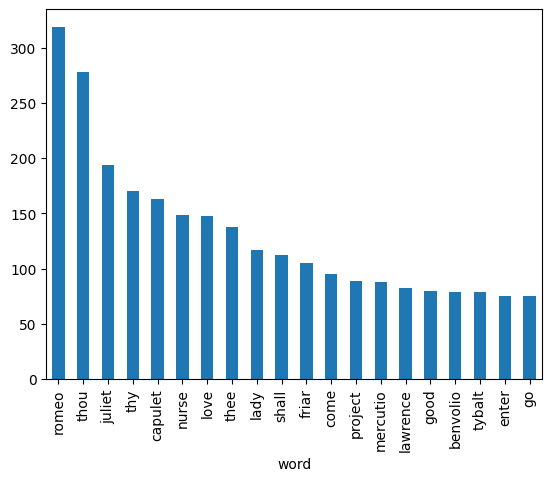

In [25]:
#VISUALIZING THE DATA
axes = df.plot.bar( x = 'word', y = 'count', legend = False)

In [26]:
#visualizing word frequencies with the open source wordcloud module
#first load the data 
from pathlib import Path
from textblob import TextBlob
text = Path('RomeoAndJuliet.txt').read_text(encoding = 'utf-8')


In [27]:
#loading the mask image that specifies the word cloud shape
#lets load mask image with the imread function from the imageio module that comes with anaconda
import imageio.v2 as imageio
mask_image = imageio.imread('mask_heart.png')
#this function retuns the image  by using the imread as a numpy array, which is required by word cloud


In [28]:
#configuring the word count object
from wordcloud import WordCloud
wordcloud = WordCloud(colormap= 'prism', mask = mask_image, 
                      background_color = 'white')


In [29]:
#generating the word cloud 
wordcloud= wordcloud.generate(text)
wordcloud

In [30]:
#SAVING THE WORD CLOUD AS AN IMAGE FILE
wordcloud = wordcloud.to_file('RomeoAndJulietHeart.png')

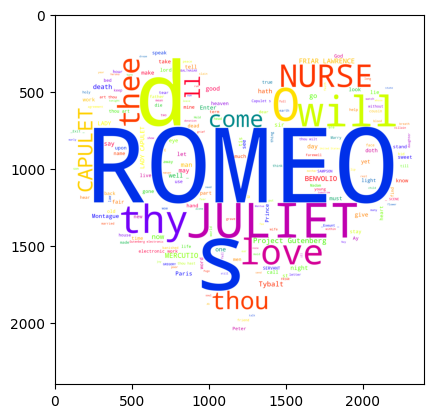

In [31]:
#DISPLAYING THE IMAGE WITH MATPLOTLIB
import matplotlib.pyplot as plt
plt.imshow(wordcloud)

In [32]:
#GENERATING A WORD CLOUD FROM A DICTIONARY

In [33]:
#READABILITY ASSESSMENT WITH TEXTATISTIC
#load text
from pathlib import Path
from textblob import TextBlob
text = Path('RomeoAndJuliet.txt').read_text(encoding = 'utf-8')

In [34]:
from textatistic import Textatistic
readability = Textatistic(text)

In [35]:
%precision 3

'%.3f'

In [36]:
readability.dict()

{'char_count': 131145,
 'word_count': 29175,
 'sent_count': 3396,
 'sybl_count': 35214,
 'notdalechall_count': 6839,
 'polysyblword_count': 1030,
 'flesch_score': 96.004,
 'fleschkincaid_score': 2.003,
 'gunningfog_score': 4.849,
 'smog_score': 6.275,
 'dalechall_score': 7.764}

In [37]:
#NAMED ENTITY RECOGNITION WITH spaCy
import spacy
nlp= spacy.load('en_core_web_sm')

In [38]:
#creating a spacy document
document = nlp('In 1994, Tim Berners-Lee founded the ' +
               'World Wide Web Consortium (W3C), devoted to' +
               'developing web technologies')

In [39]:
#getting the named entities
for entity in document.ents:
    print(f'{entity.text}: {entity.label_}')

1994: DATE
Tim Berners-Lee: PERSON
the World Wide Web Consortium: WORK_OF_ART


In [40]:
#COMPARING TWO TEXTS 
from pathlib import Path
from textblob import TextBlob
document1 = nlp(Path('RomeoAndJuliet.txt').read_text(encoding= 'utf-8'))
document2 = nlp(Path('EdwardTheSecond.txt').read_text(encoding= 'utf-8'))

In [41]:
document1.similarity(document2)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10192\829065171.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  document1.similarity(document2)


0.954